In [1]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
# Set seed for results reproducibility 
seed = 42

In [3]:
df_2018 = pd.read_csv(r"C:\Users\Gonzalo\Desktop\df_2018.csv", index_col=0)
# Drop the null rows
df_2018 = df_2018.set_index("codigo_x").dropna()
df_2018.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7505,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.63,1008.23,468,82,0003A,sigue,11.188,24.283333,0,1
6600,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,22.60,1007.26,1187,80,1,sigue,8.079,27.766667,46,1
7515,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.53,1008.33,202,72,1,fue,8.400,21.900000,0,0
5933,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,21.45,1008.41,1582,51,1,sigue,3.738,10.183333,21,1
7170,7,5,618.52,132.86,60,60,120.22,0.0,0.0,0.0,...,50.12,1441.48,774,57,1,sigue,8.113,20.516667,0,1


In [4]:
df_2019 = pd.read_csv(r"C:\Users\Gonzalo\Desktop\df_2019.csv", index_col=0)
# Drop the null rows
df_2019 = df_2019.set_index("codigo_x").dropna()
df_2019.head()

,dias_pag,dias_lab,sueldo,comp,asist,transp,vales_x,te_dob,te_trip,desc_Lab,...,t_ded,neto,antig,depto,puesto,label,tiempov,dist,delitos,label2
codigo_x,,,,,,,,,,,,,,,,,,,,,
7840,7,5,1143.52,462.91,60,60,257.02,367.56,673.86,0.0,...,340.18,3011.41,39,87,185,fue,4.940,6.433333,0,0
7505,7,5,721.00,173.04,60,60,143.04,0.00,0.00,0.0,...,86.05,1777.03,520,82,0003A,fue,11.188,24.283333,0,0
6600,7,5,721.00,30.38,60,50,120.22,180.25,0.00,0.0,...,21.07,1173.91,1503,80,0002A,sigue,8.079,27.766667,46,1
7685,7,5,721.00,30.38,60,60,120.22,0.00,0.00,0.0,...,28.04,1028.65,522,5,0002A,sigue,9.926,22.383333,0,1
7331,7,5,721.00,30.38,60,60,120.22,103.00,0.00,0.0,...,24.71,1104.85,338,45,1,fue,8.901,17.116667,59,0


# Read the CSV and Perform Basic Data Cleaning

In [5]:
#df_all.dropna(how='all', axis=1)
#df_all.head()

In [6]:
#df_all['dias_ratio']=df_all['dias_lab']/df_all['dias_pag']
#df_all['dias_ratio'].fillna(0)

In [7]:
#list(df_all)

# Select your features (columns)

In [8]:
df_2018[["otras","fonac","alim","infon","falt","enf","ISPT","IMSS","t_ded"]]*=-1
df_2019[["otras","fonac","alim","infon","falt","enf","ISPT","IMSS","t_ded"]]*=-1

In [9]:
# Set features. This will also be used as your x values.
df_selected2018 = df_2018[['dias_lab','neto','depto', 'tiempov','dist','delitos']]
df_selected2019 = df_2019[['dias_lab','neto','depto', 'tiempov','dist','delitos']]

In [10]:
#df_3["Puesto"] = df_3["Puesto"].apply(lambda row: label(row))
X1 = df_selected2018
X2 = df_selected2019

In [11]:
y1 = df_2018["label2"]
y2 = df_2019["label2"]

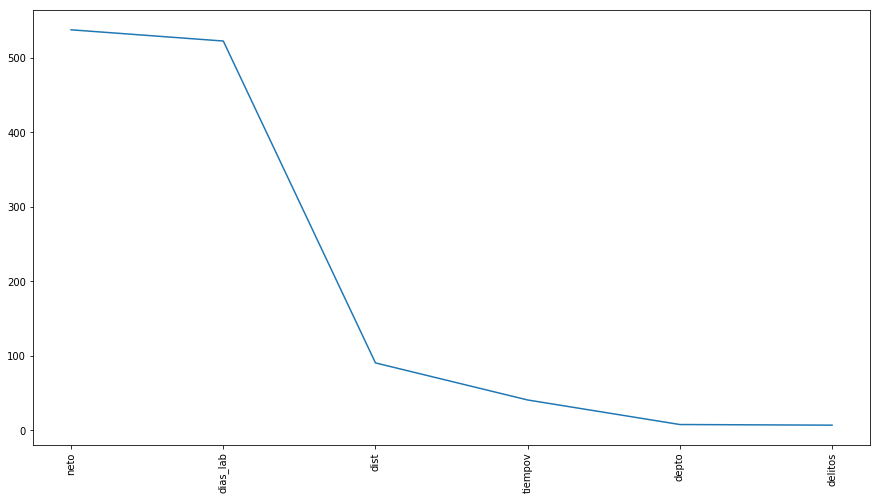

In [12]:
# Apply Univariate Feature Selection 
skb = SelectKBest(f_classif, k='all')
fit = skb.fit(X1,y1)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X1.columns)

#concat two dataframes for better visualization 
feat_scores1 = pd.concat([df_columns,df_scores],axis=1)
feat_scores1.columns = ['Feature','Score'] 
feat_scores1 = feat_scores1.sort_values(by=['Score'], ascending=False)

# Plot features to compare significative scores
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(feat_scores1.Feature, feat_scores1.Score)
plt.xticks(rotation=90)
plt.show()

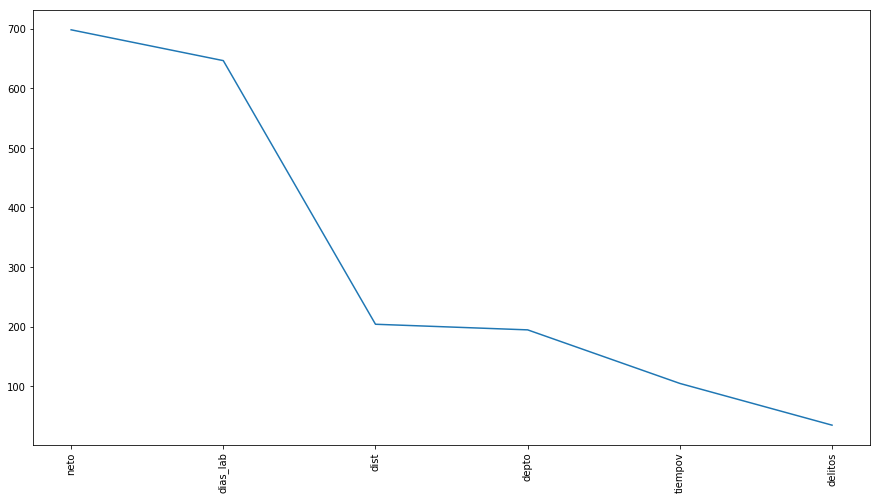

In [13]:
# Apply Univariate Feature Selection 
skb = SelectKBest(f_classif, k='all')
fit = skb.fit(X2,y2)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X2.columns)

#concat two dataframes for better visualization 
feat_scores2 = pd.concat([df_columns,df_scores],axis=1)
feat_scores2.columns = ['Feature','Score'] 
feat_scores2 = feat_scores2.sort_values(by=['Score'], ascending=False)

# Plot features to compare significative scores
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(feat_scores2.Feature, feat_scores2.Score)
plt.xticks(rotation=90)
plt.show()

# Create a Train Test Split

Use `status_bin` for the y values

In [14]:
# Select 11 features with highest score
sel_columns1 = feat_scores1.iloc[0:8, 0].values
sel_columns2 = feat_scores2.iloc[0:8, 0].values
# Slice dataframe based on the selected features
X_featSel1 = X1[sel_columns1]
X_featSel2 = X2[sel_columns2]

In [15]:
#Manual data_split to create training and testing data
X_train = X1[sel_columns1]
X_test = X2[sel_columns2]
y_train = y1
y_test = y2

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [16]:
# Scale your data

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\Gonzalo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [17]:
len(X_train_scaled[0])

6

In [18]:
len(X_test_scaled[0])

6

In [19]:
# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(y_train)
#encoded_y_train = label_encoder.transform(y_train)
#encoded_y_test = label_encoder.transform(y_test)

In [20]:
# Step 2: Convert encoded labels to one-hot-encoding
# ohe = 
#y_train_categorical = to_categorical(encoded_y_train)
#y_test_categorical = to_categorical(encoded_y_test)

#y_train_categorical = y_train_categorical[0]

# Train the Model



In [21]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#dtest = xgb.DMatrix(X_test, label=y_test)

In [22]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_train_scaled, y_train)]
model.fit(X_train_scaled, y_train,eval_metric="error", eval_set=eval_set, verbose=True)


[0]	validation_0-error:0.25985
[1]	validation_0-error:0.240938
[2]	validation_0-error:0.237884
[3]	validation_0-error:0.237884
[4]	validation_0-error:0.239657
[5]	validation_0-error:0.239854
[6]	validation_0-error:0.239263
[7]	validation_0-error:0.238081
[8]	validation_0-error:0.23818
[9]	validation_0-error:0.23552
[10]	validation_0-error:0.234535
[11]	validation_0-error:0.234338
[12]	validation_0-error:0.234043
[13]	validation_0-error:0.232073
[14]	validation_0-error:0.230299
[15]	validation_0-error:0.230693
[16]	validation_0-error:0.229413
[17]	validation_0-error:0.229413
[18]	validation_0-error:0.225473
[19]	validation_0-error:0.222025
[20]	validation_0-error:0.223798
[21]	validation_0-error:0.217199
[22]	validation_0-error:0.214342
[23]	validation_0-error:0.214539
[24]	validation_0-error:0.210599
[25]	validation_0-error:0.208235
[26]	validation_0-error:0.213948
[27]	validation_0-error:0.211387
[28]	validation_0-error:0.206757
[29]	validation_0-error:0.202226
[30]	validation_0-error

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [23]:
# make predictions for test data
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
X_test

,neto,dias_lab,dist,depto,tiempov,delitos
codigo_x,,,,,,
7840,3011.41,5,6.433333,87,4.940,0
7505,1777.03,5,24.283333,82,11.188,0
6600,1173.91,5,27.766667,80,8.079,46
7685,1028.65,5,22.383333,5,9.926,0
7331,1104.85,5,17.116667,45,8.901,59
5933,1252.76,5,10.183333,51,3.738,21
7170,1298.92,5,20.516667,57,8.113,0
7774,1133.68,5,15.333333,87,7.071,0
5201,1722.51,5,22.333333,82,12.158,0


In [25]:
results = pd.DataFrame({
"prediction": y_pred,
    "actual": y_test
})


In [26]:
results.head()

,prediction,actual
codigo_x,,
7840,0,0
7505,0,0
6600,0,1
7685,1,1
7331,0,0


In [27]:
results.to_csv(r'C:\Users\Gonzalo\Desktop\ResultsXGB.csv')

In [28]:
# make predictions for test data
y_pred2 = model.predict(X_train_scaled)
y_pred2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
predictions = [round(value) for value in y_pred]

In [30]:
predictions2 = [round(value) for value in y_pred2]

In [31]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 50.63%


In [32]:
# evaluate predictions2
accuracy = accuracy_score(y_train, predictions2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.86%


In [33]:
features_used=list(X2[sel_columns2])
print(features_used,model.feature_importances_)

['neto', 'dias_lab', 'dist', 'depto', 'tiempov', 'delitos'] [0.26573828 0.04331041 0.15527922 0.21987641 0.1441889  0.17160684]


In [34]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
neto,0.265738
tiempov,0.219876
delitos,0.171607
dist,0.155279
depto,0.144189
dias_lab,0.043310


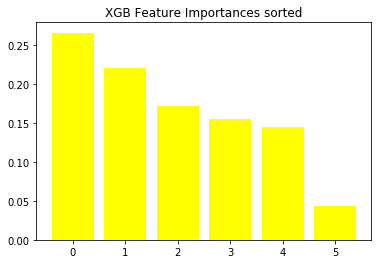

In [38]:
plt.bar(range(6), feature_importances['importance'], color="yellow")
plt.title("XGB Feature Importances sorted")
plt.show()

In [36]:

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.173223 using {'learning_rate': 0.3}
-0.690401 (0.000088) with: {'learning_rate': 0.0001}
-0.667634 (0.000780) with: {'learning_rate': 0.001}
-0.552690 (0.004996) with: {'learning_rate': 0.01}
-0.336824 (0.008060) with: {'learning_rate': 0.1}
-0.239081 (0.006111) with: {'learning_rate': 0.2}
-0.173223 (0.009003) with: {'learning_rate': 0.3}
